In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 69.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [5]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(2)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,50,4,4,4,4,3,4,4,4,4,4
1,35,4,5,4,4,1,1,5,4,1,2


In [6]:
# 相関の確認
df_numeric.corr()['年齢']

年齢               1.000000
Wifi設備          -0.000330
送迎の便利さ           0.036484
オンライン予約のしやすさ     0.010020
ホテルの立地          -0.014362
食事の満足度           0.013261
滞在時の快適さ          0.149749
チェックイン・アウトの接客    0.027539
その他のサービス        -0.055383
清潔さ              0.046433
満足度              0.077890
Name: 年齢, dtype: float64

In [7]:
# 年齢・満足度列の削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)
_df.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,4,4,4,4,3,4,4,4,4
1,4,5,4,4,1,1,5,4,1
2,1,1,1,4,1,5,1,3,1


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
# 標準化の実行
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [10]:
from sklearn.cluster import KMeans

In [11]:
sse = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)             # クラスタリングの計算を実行
    sse.append(kmeans.inertia_)   # kmeans.fitするとkmeans.inertia_が得られる

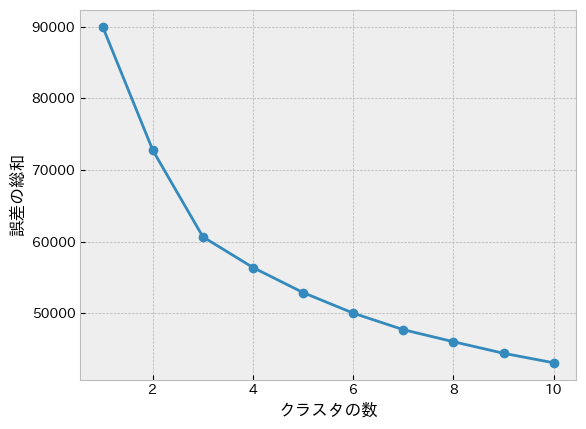

In [12]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数') 
plt.ylabel('誤差の総和')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[2 0 0 ... 2 2 1]


In [14]:
# cluster、満足度のカラム追加
df['cluster'] = cluster
df.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,2
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0


In [15]:
# クラスターごとにグループ分け
groups = df.groupby('cluster')
groups.size()

cluster
0    3291
1    3058
2    3651
dtype: int64

In [16]:
# 代表値を取得
groups.agg(['min', 'max', 'mean', 'median'])

年齢                       Wifi設備                      送迎の便利さ      ...  \
        min max       mean median    min max      mean median    min max  ...   
cluster                                                                   ...   
0         7  80  37.333637   36.0      1   5  2.515041    2.0      0   5  ...   
1         7  80  40.347613   41.0      1   5  1.949967    2.0      0   5  ...   
2         7  80  40.706656   42.0      1   5  3.807176    4.0      0   5  ...   

         その他のサービス        清潔さ                      満足度                       
             mean median min max      mean median min max      mean median  
cluster                                                                     
0        3.396840    4.0   0   5  1.914312    2.0   1   4  2.272258    2.0  
1        3.684107    4.0   1   5  3.980052    4.0   1   5  3.302485    3.0  
2        3.839222    4.0   1   5  3.929882    4.0   2   5  3.955629    4.0  

[3 rows x 44 columns]

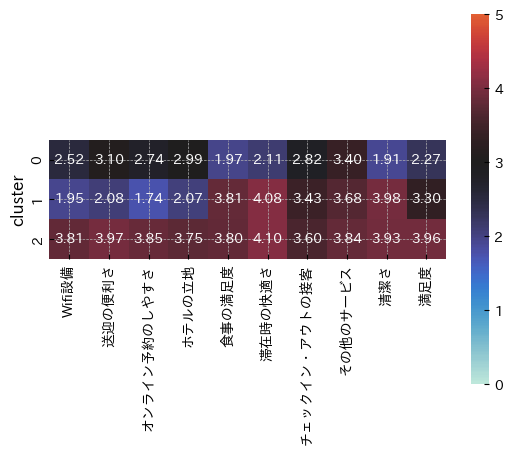

In [17]:
mean = groups.mean().drop('年齢', axis=1)
sns.heatmap(mean, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0);

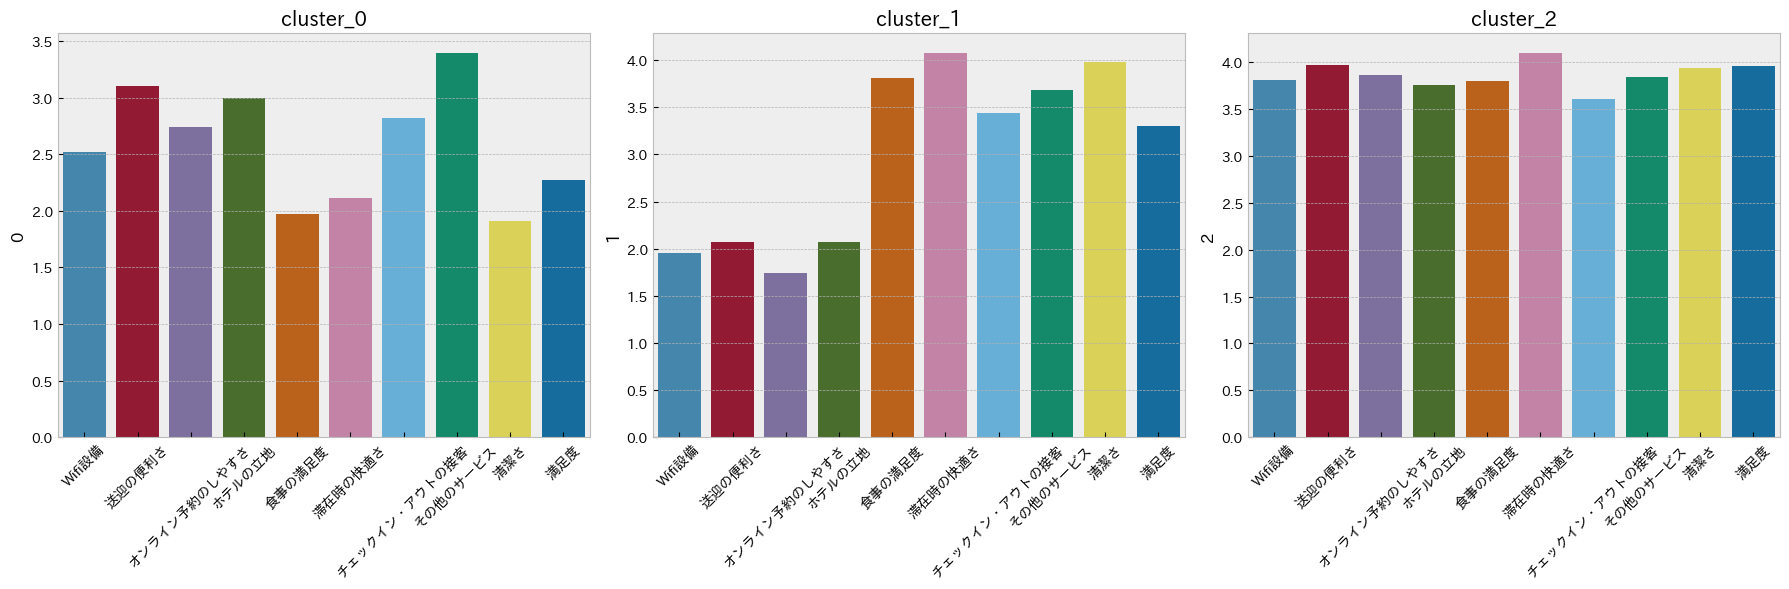

In [18]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))


for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示  

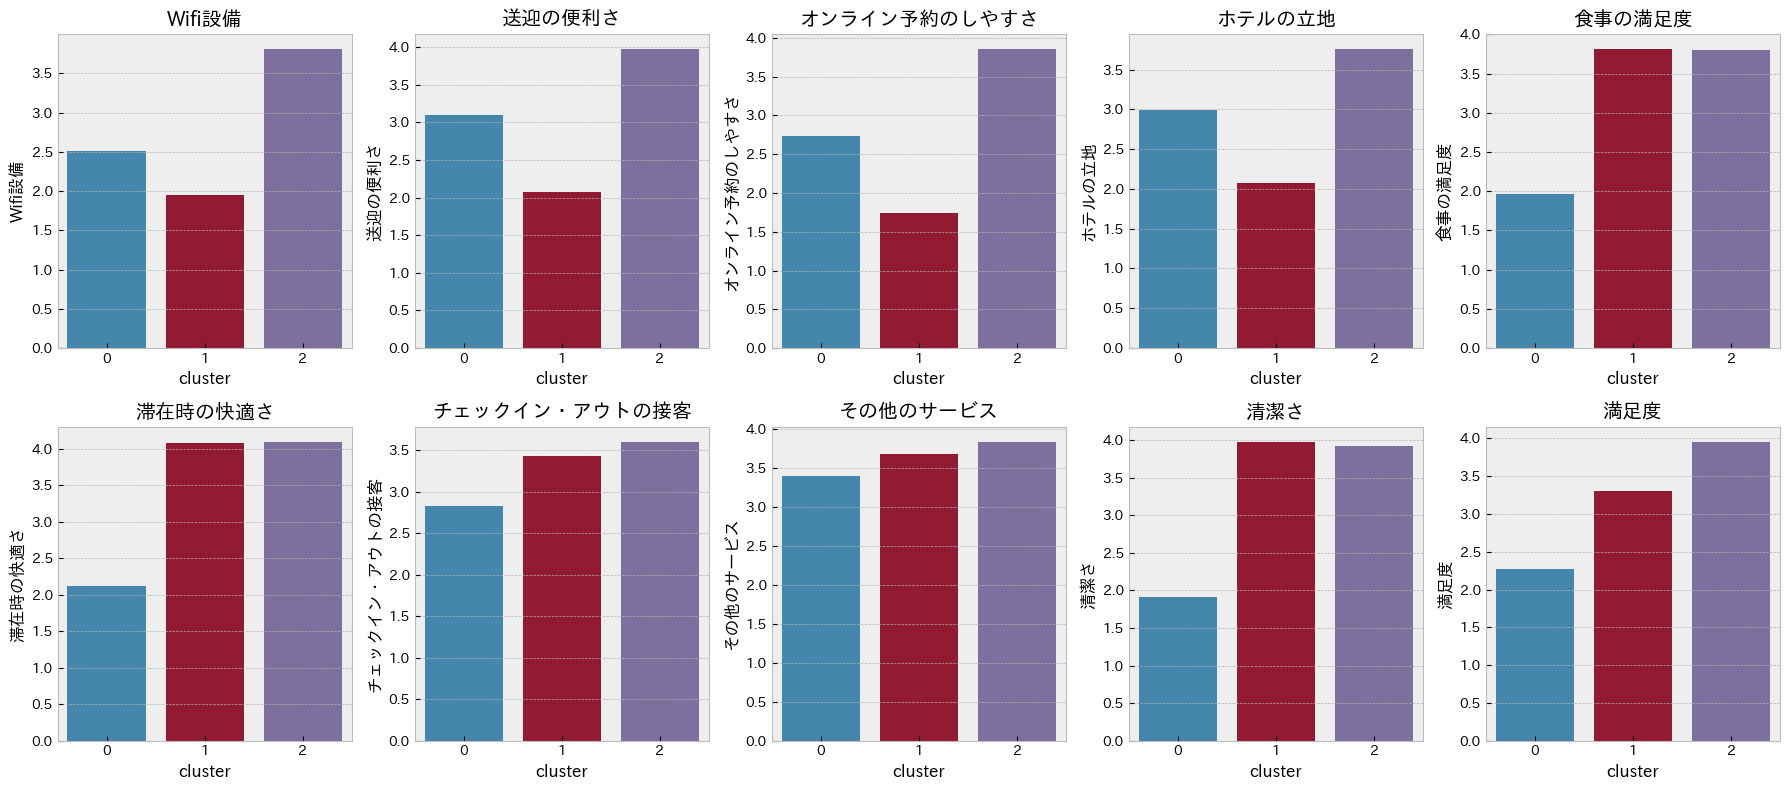

In [19]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

In [20]:
# 各クラスターを取得（可視化のためにindexを振り直す）
cluster_0 = groups.get_group(0)
cluster_0 = cluster_0.reset_index(drop=True)
cluster_0.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0
1,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,0


In [21]:
cluster_1 = groups.get_group(1)
cluster_1 = cluster_1.reset_index(drop=True)
cluster_2 = groups.get_group(2)
cluster_2 = cluster_2.reset_index(drop=True)

In [22]:
# 箱ひげ図可視化用の関数
def box_plot(col1, col2, dflist, high=6, width=18):
    plt.rcParams['figure.figsize'] = width, high

    for i, cluster in enumerate(dflist):
        plt.subplot(1, len(dflist), i+1)
        plt.title(f'クラスター{i}：{col1}と{col2}')
        sns.boxplot(x=col1, y=col2, data=cluster)
        plt.tight_layout();

In [23]:
df_list = [cluster_0, cluster_1, cluster_2]

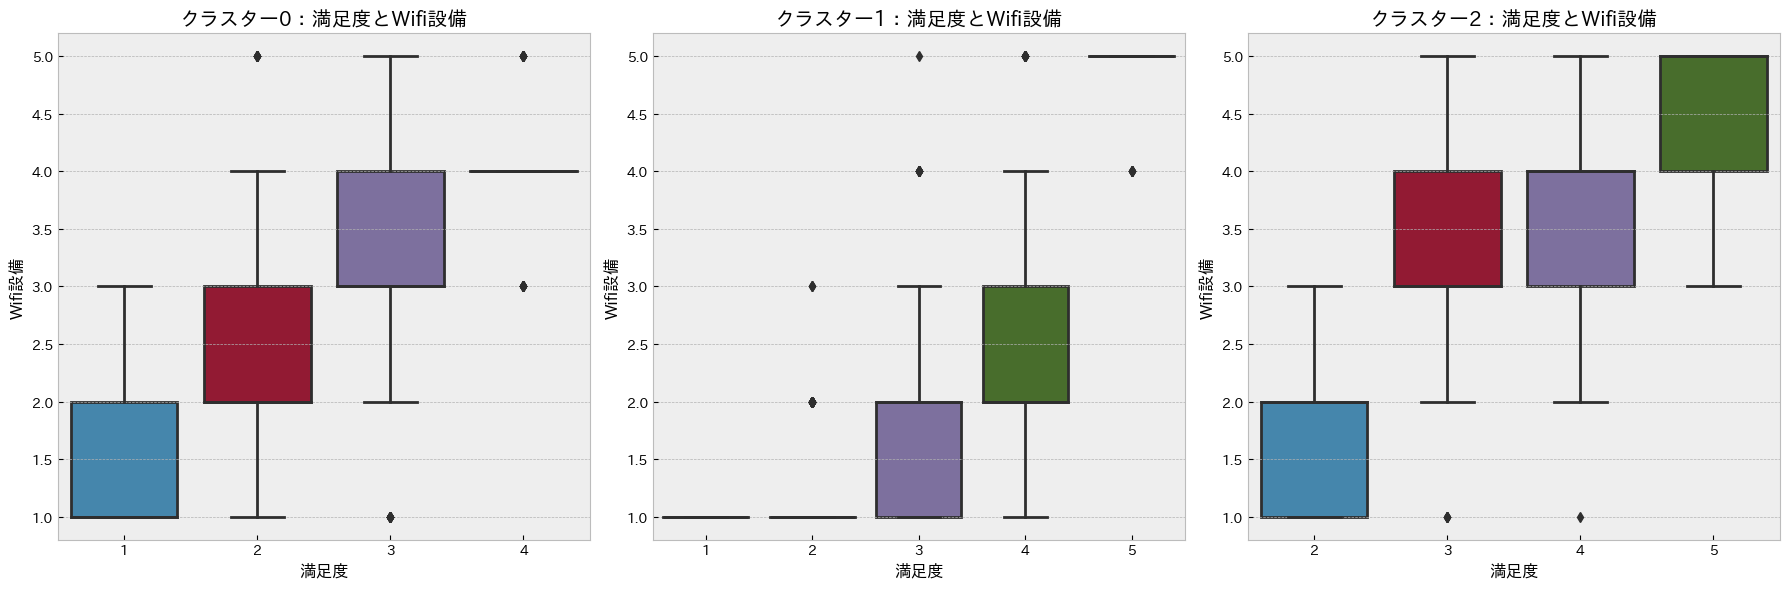

In [24]:
box_plot('満足度', 'Wifi設備', df_list)

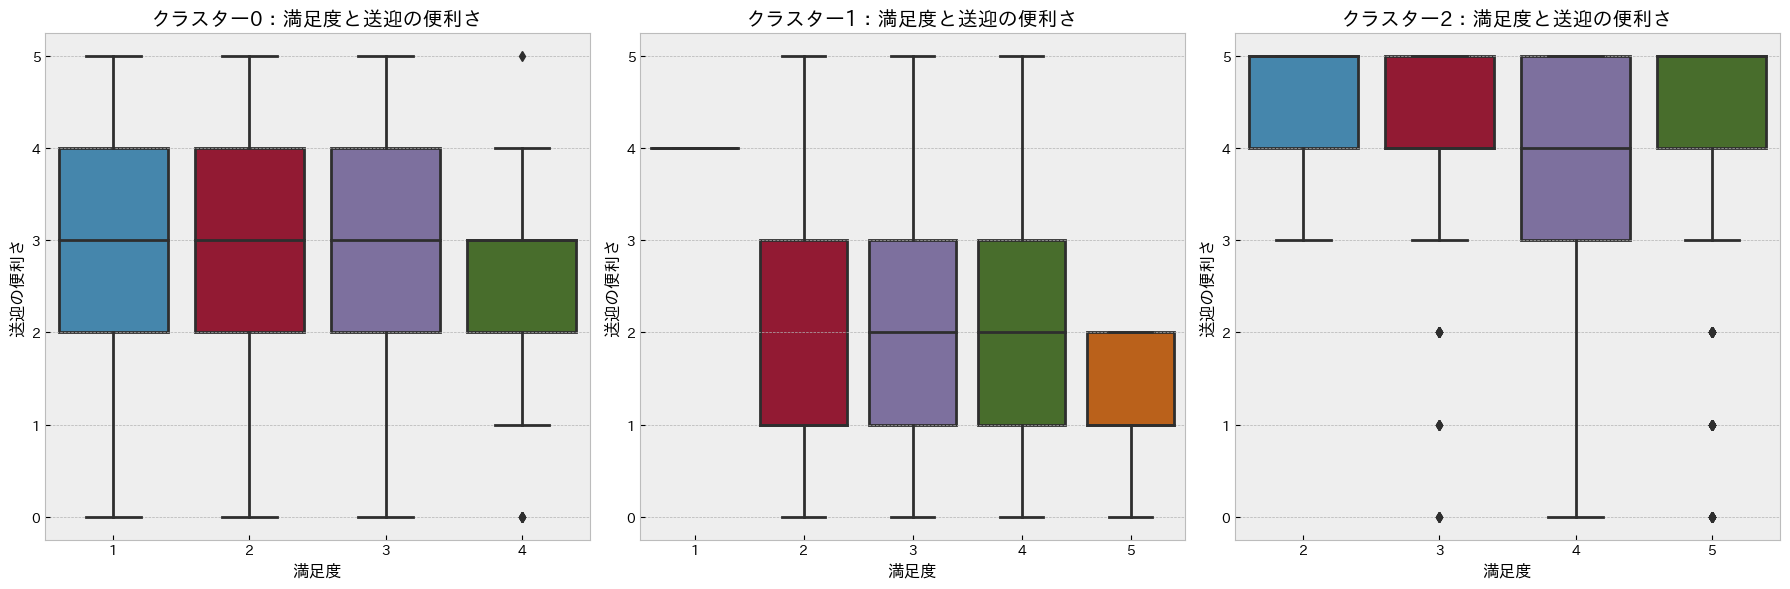

In [25]:
# 送迎の便利さ
box_plot('満足度', '送迎の便利さ', df_list)

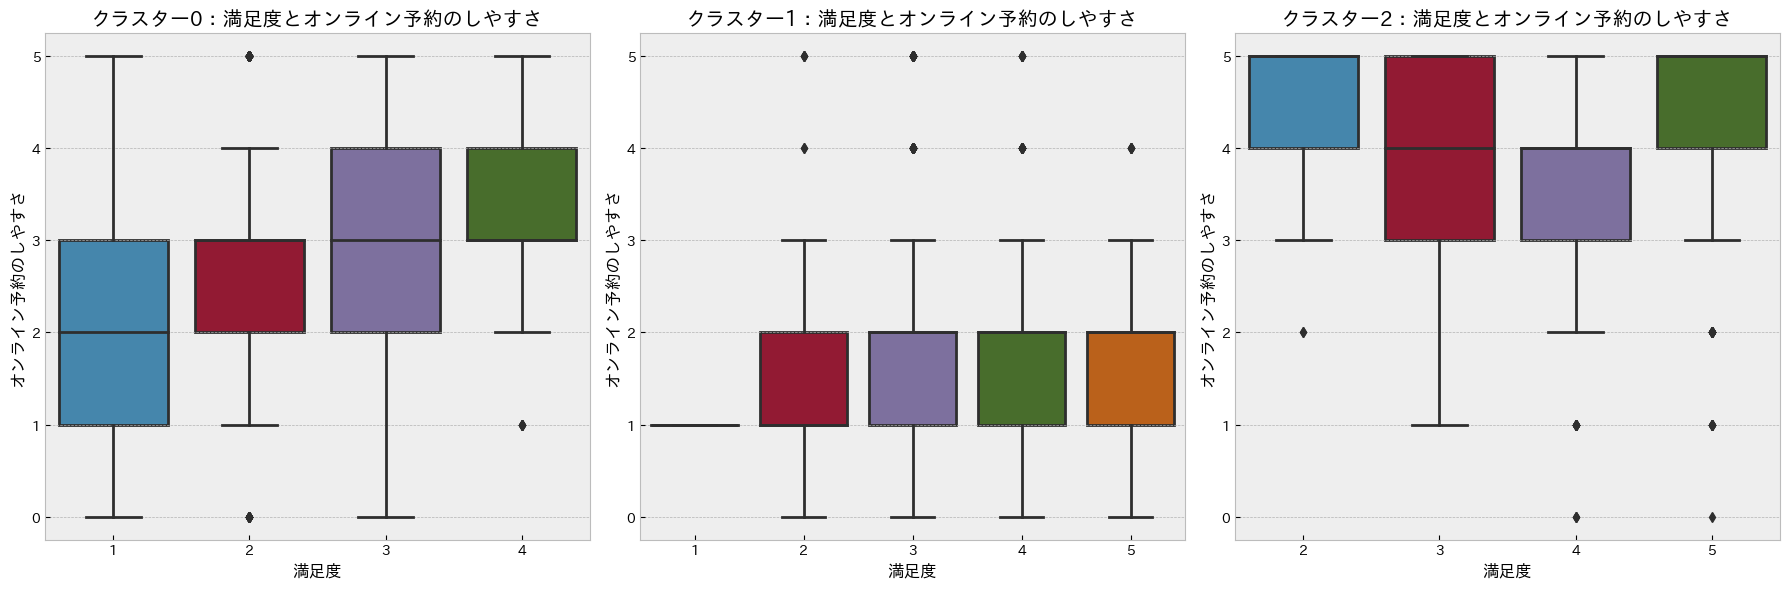

In [26]:
# オンライン予約のしやすさ
box_plot('満足度', 'オンライン予約のしやすさ', df_list)

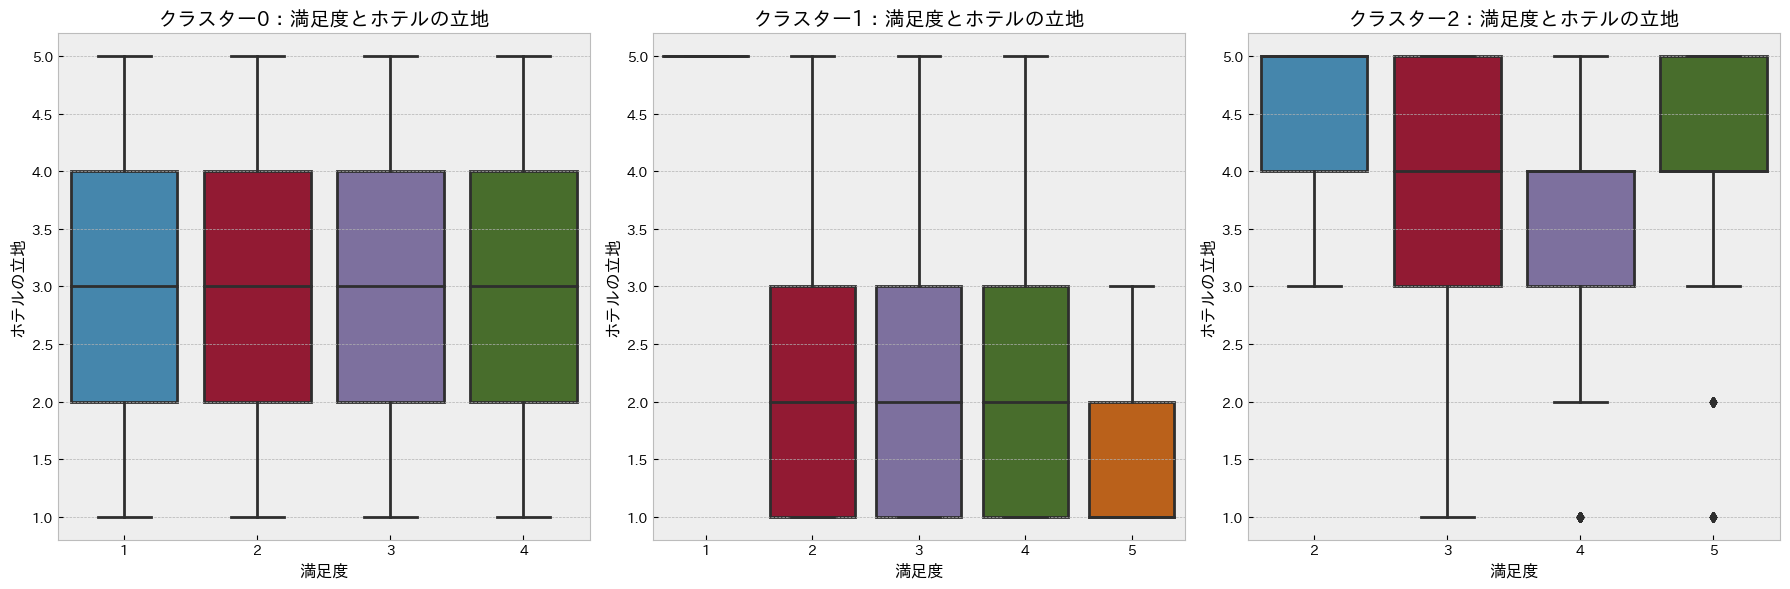

In [27]:
# ホテルの立地
box_plot('満足度', 'ホテルの立地', df_list)

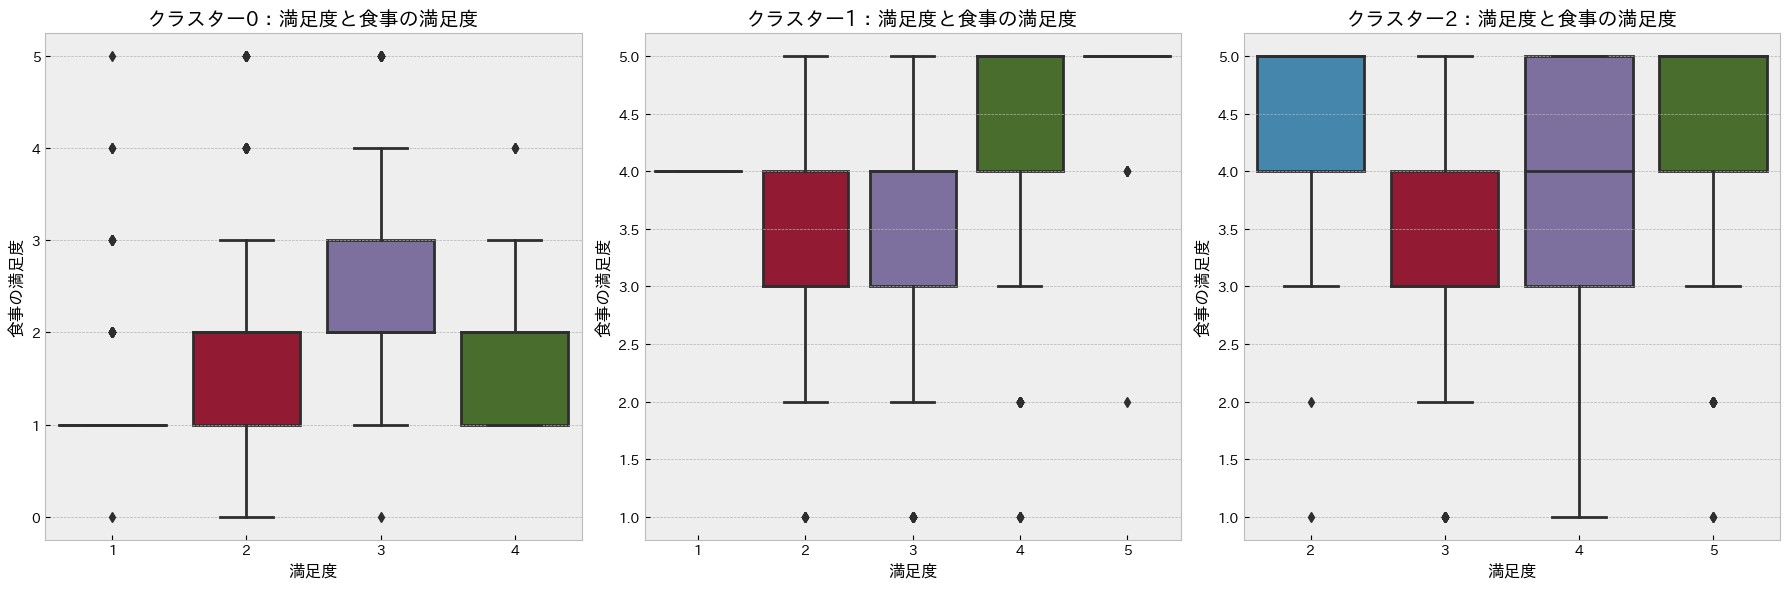

In [28]:
# 食事の満足度について
box_plot('満足度', '食事の満足度', df_list)

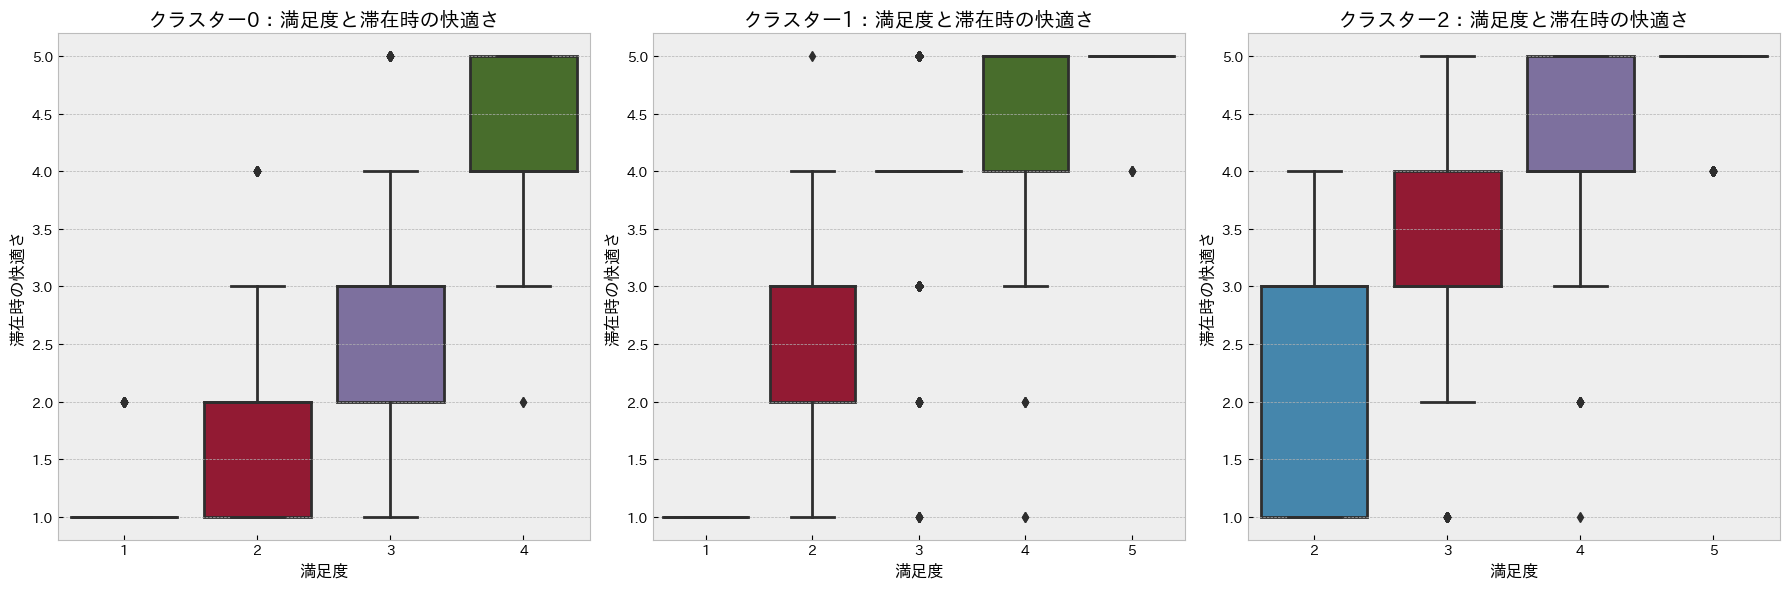

In [29]:
# 滞在時の快適さについて
box_plot('満足度', '滞在時の快適さ', df_list)

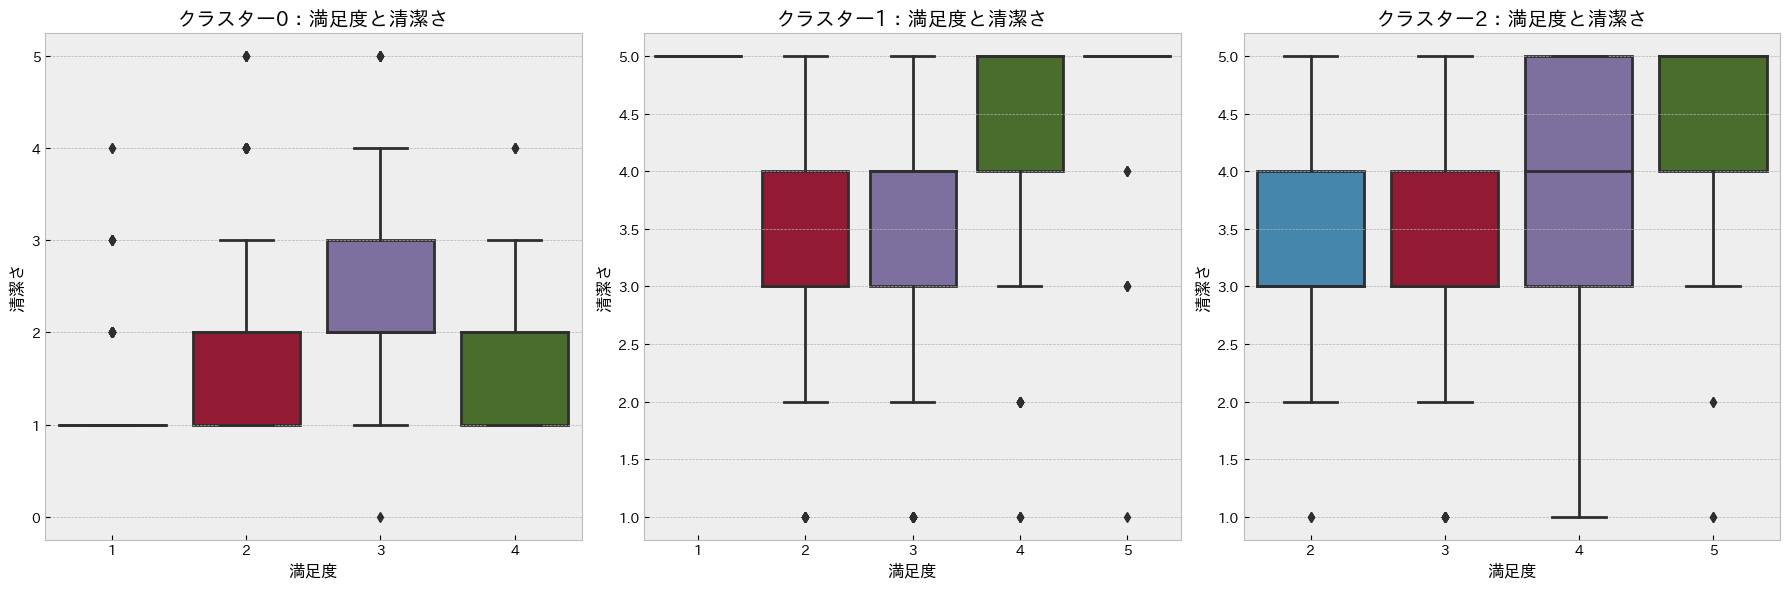

In [30]:
# 清潔さについて
box_plot('満足度', '清潔さ', df_list)